In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("./data/2024-01_rws_filedata.csv",delimiter=';')
df.head()


,NLSitNummer,DatumFileBegin,DatumFileEind,TijdFileBegin,TijdFileEind,FileZwaarte,GemLengte,FileDuur,HectometerKop,HectometerStaart,...,VERKEERSKUNDIGWEGVAKVILD,TRAJECTVILD,OorzaakGronddetail,OorzaakVerloop,OorzaakCodeVerloop,OorzaakCode,Oorzaak_1,Oorzaak_2,Oorzaak_3,Oorzaak_4
0,3908337,2024-01-17,2024-01-17,15:41:29,17:15:03,"339,422","3628,000","93,567","52,4","55,3",...,Everdingen - Lexmond,Utrecht - Gorinchem,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 94],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
1,3908338,2024-01-17,2024-01-17,15:41:29,15:46:01,"11,773","2597,000","4,533","208,6","210,8",...,Grathem - Kelpen-Oler,Maastricht - Eindhoven,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 5],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
2,3908339,2024-01-17,2024-01-17,15:41:29,16:08:00,"90,428","3410,000","26,517","61,2","59,1",...,Delft - Ketheltunnel,Den Haag - Rotterdam,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 27],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
3,3908340,2024-01-17,2024-01-17,15:41:29,15:43:00,"3,185","2100,000","1,517","41,8","43,9",...,Maasbree - Blerick,Nijmegen - Maasbracht,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit
4,3908341,2024-01-17,2024-01-17,15:42:29,15:44:00,"5,915","3900,000","1,517","13,5","9,6",...,Delft-Zuid - Rotterdam The Hague Airport,Rijswijk - Rotterdam,Spitsfile (geen oorzaak gemeld),[Geen oorzaakcode opgegeven door VWM 2],[000],001,Spitsfile (geen oorzaak gemeld),Geen oorzaak gemeld,Drukte,Hoge intensiteit


count    26436.000000
mean        13.188110
std         27.672118
min          0.100000
25%          1.567000
50%          3.567000
75%         10.554250
max        821.133000
Name: FileDuurFloat, dtype: float64


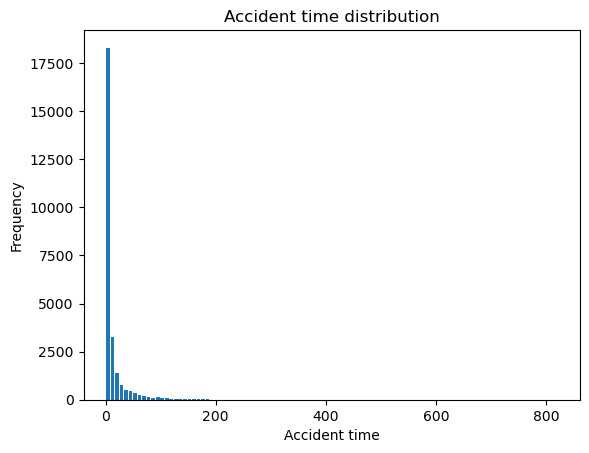

In [50]:
def toFloat(string):
    converted = float(string.replace(',','.'))
    # print(f"{string} -> {converted}")
    return converted

df['FileDuurFloat'] = df['FileDuur'].apply(toFloat)

# df["FileDuur"] = pd.to_numeric(df["FileDuur"], downcast="float")
# df['FileDuurFloat'].astype()
print(df['FileDuurFloat'].describe())
plt.figure()
plt.title('Accident time distribution')
plt.xlabel('Accident time')
plt.ylabel('Frequency')
plt.hist(df['FileDuurFloat'],bins=100,rwidth=0.8)
plt.show()

In [51]:
df["start_datetime"] = pd.to_datetime(df["DatumFileBegin"] + " " + df["TijdFileBegin"]) # To get right format
df["end_datetime"]   = pd.to_datetime(df["DatumFileEind"] + " " + df["TijdFileEind"])
xs = np.arange(0,24)
df_starttime = df.apply(lambda x: x['start_datetime'].hour,axis=1)
hour_counts = df_starttime.value_counts().sort_index()
# print(hour_counts)

In [52]:
print(df)

       NLSitNummer DatumFileBegin DatumFileEind TijdFileBegin TijdFileEind  \
0          3908337     2024-01-17    2024-01-17      15:41:29     17:15:03   
1          3908338     2024-01-17    2024-01-17      15:41:29     15:46:01   
2          3908339     2024-01-17    2024-01-17      15:41:29     16:08:00   
3          3908340     2024-01-17    2024-01-17      15:41:29     15:43:00   
4          3908341     2024-01-17    2024-01-17      15:42:29     15:44:00   
...            ...            ...           ...           ...          ...   
26431      3921121     2024-01-25    2024-01-25      16:01:30     16:59:00   
26432      3921122     2024-01-25    2024-01-25      16:01:30     16:04:00   
26433      3921123     2024-01-25    2024-01-25      16:01:30     16:45:03   
26434      3921124     2024-01-25    2024-01-25      16:01:30     16:03:00   
26435      3921125     2024-01-25    2024-01-25      16:01:30     18:19:00   

      FileZwaarte GemLengte FileDuur HectometerKop HectometerSt

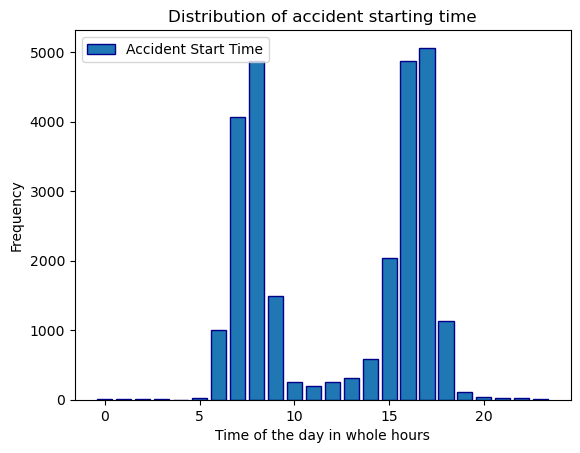

In [47]:
plt.figure()
plt.bar(xs,hour_counts,align='center',edgecolor='darkblue',label='Accident Start Time')
plt.title("Distribution of accident starting time")
plt.legend()
plt.xlabel("Time of the day in whole hours")
plt.ylabel("Frequency")
plt.show()

                      days  accidents_perday
count                   32         32.000000
mean   2024-01-16 12:00:00        826.343750
min    2024-01-01 00:00:00          1.000000
25%    2024-01-08 18:00:00         60.750000
50%    2024-01-16 12:00:00        880.500000
75%    2024-01-24 06:00:00       1599.250000
max    2024-02-01 00:00:00       2206.000000
std                    NaN        760.949263


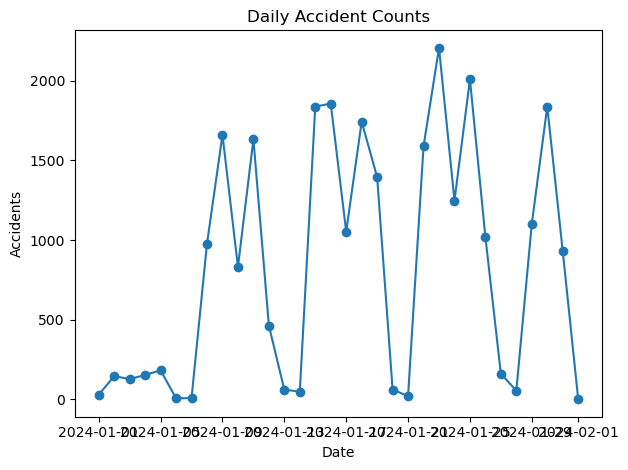

In [55]:
df["days"] = df.apply(lambda x: pd.date_range(start=x["start_datetime"].date(),end=x["end_datetime"].date()).tolist(), axis=1)
df_exploded_days = df.explode("days")
accidents_per_day = df_exploded_days.groupby("days").size()
# print(accidents_per_day)
print(accidents_per_day.reset_index(name="accidents_perday").describe())

plt.figure()
plt.plot(accidents_per_day.index, accidents_per_day.values, marker='o', linestyle='-')
plt.title("Daily Accident Counts")
plt.xlabel("Date")
plt.ylabel("Accidents")
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## N Incidents per hour of the day

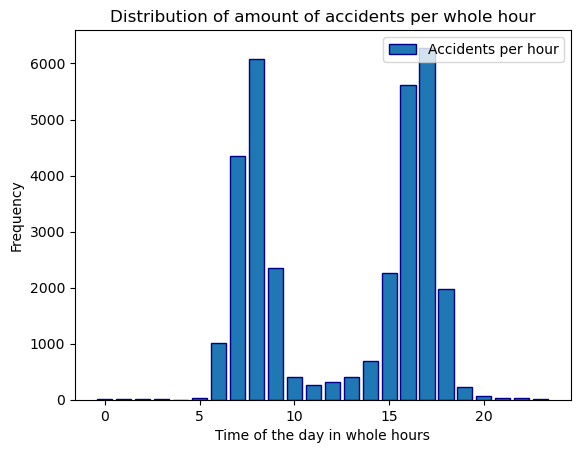

In [59]:
df["hours"] = df.apply(lambda x: list(range(x["start_datetime"].hour, x["end_datetime"].hour + 1)),axis=1)
# print(df['hours'])
df_exploded_hours = df.explode("hours") # explodes Takes values from the list
# print(df_exploded_hours)
accidents_per_hour = df_exploded_hours.groupby("hours").size()
# print(accidents_per_hour.describe())
plt.figure()
plt.bar(xs,accidents_per_hour,align='center',edgecolor='darkblue',label='Accidents per hour')
# plt.bar(xs,hour_counts,align='center',edgecolor='darkblue',color='r',alpha=0.5,label='Accident Start Time')
plt.legend()
plt.title("Distribution of amount of accidents per whole hour")
plt.xlabel("Time of the day in whole hours")
plt.ylabel("Frequency")
plt.show()

# Distribution fitting

In [34]:
# Time elapsed between 2 successive events

In [35]:
df = df.sort_values('start_datetime')

df['time_elapsed'] = df['start_datetime'].diff()

In [36]:
df['time_elapsedSec'] = df['time_elapsed'].dt.total_seconds()
df['time_elapsedMin'] = df['time_elapsed'].dt.total_seconds().div(60).astype(float)

count    26435.000000
mean         1.679441
std         22.103016
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       1299.983333
Name: time_elapsedMin, dtype: float64
count    26435.000000
mean       100.766446
std       1326.180979
min          0.000000
25%          0.000000
50%          0.000000
75%         60.000000
max      77999.000000
Name: time_elapsedSec, dtype: float64


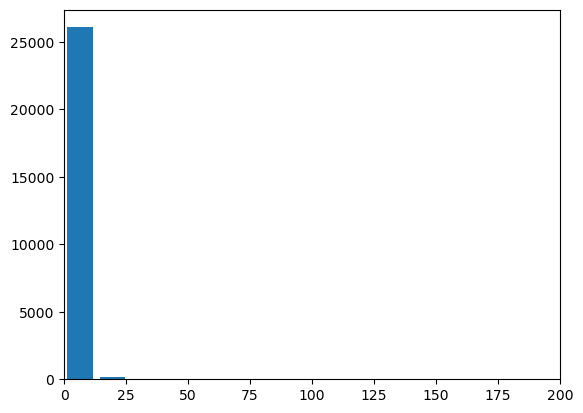

In [37]:
print(df['time_elapsedMin'].describe())
print(df['time_elapsedSec'].describe())

plt.figure()
plt.hist(df['time_elapsedMin'],bins=100,rwidth=0.8)
plt.xlim(0,200)
plt.show()

In [38]:
from scipy import stats

# Tried fitting normal on log transformed time_elapsed

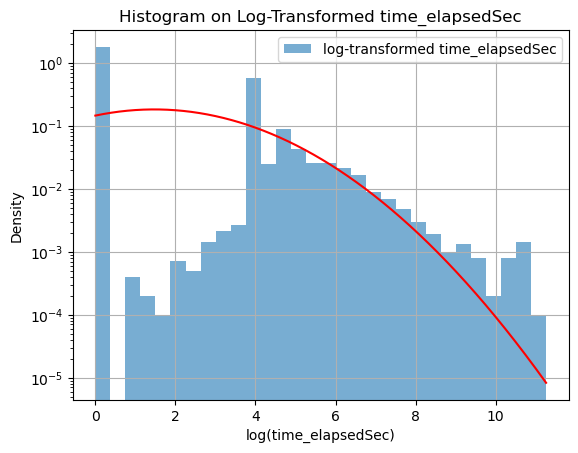

In [41]:
y = df['time_elapsedSec'].dropna().values

# Apply logarithmic transform to get (somewhat) normal dist
y_log = np.log1p(y)
# y_log = y # Protoyping purpose


#Method of moments for lognormal

# Log Norm
M1 = np.mean(y_log)
M2 = np.mean(y_log**2)
muEst = M1
sigmaEst = np.sqrt(M2-M1**2)
fitDist = stats.norm(muEst, sigmaEst)


xs = np.arange(np.min(y_log),np.max(y_log),0.01)
ys = fitDist.pdf(xs)
# Plot histogram of the log-transformed data
plt.figure()

plt.yscale('log')
plt.hist(y_log,density=True, bins=30, alpha=0.6, label='log-transformed time_elapsedSec')
plt.plot(xs, ys, 'r-')
plt.title("Histogram on Log-Transformed time_elapsedSec")
plt.xlabel("log(time_elapsedSec)")
plt.ylabel("Density")
plt.legend()

plt.grid(True)
plt.show()

In [20]:
tst1 = stats.kstest(y_log, fitDist.cdf)
print(f"P: {tst1[1]}",tst1)


P: 0.0 KstestResult(statistic=np.float64(0.4697159688271803), pvalue=np.float64(0.0), statistic_location=np.float64(0.0), statistic_sign=np.int8(-1))
